#TRABALHO FINAL DE ESTATÍSTICA PARA CIÊNCIA DE DADOS



Equipe E:

*   Gian Giovanni Rodrigues da Silva
*   Jessyca Jordanna Barroso de Moraes
*   Tammy Hikari Yanai Gusmão
*   Thalita Naiara Andre Alves

###Dataset

O *dataset* consiste de dados estatísticos oficiais dos 11,538 atletas que participaram dos Jogos Olímpicos de 2016 no Rio de Janeiro. Ele inclue o nome, a nacionalidade (em código de 3 dígitos), gênero, data de nascimento, altura em metros, peso em quilogramas, a modalidade esportiva, e a quantidade de medalhas de ouro, prata e/ou bronze dos respectivos atletas. 

Fonte: [Kaggle](https://www.kaggle.com/rio2016/olympic-games/)

Para fim disciplinar: 
*  adquirimos a idade de cada atleta (para agosto/2016) a partir de sua data de nascimento, gerando assim uma nova coluna *age*;
*  excluímos as colunas *id*, *name* e *dob*.

A seguir, apresentamos informações complementares sobre o dataset escolhido. 

#### Pacotes

In [1]:
# Pacotes necessários

import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import statsmodels.stats.proportion as smp
from scipy import stats
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import t,norm,chi2_contingency,ttest_ind

#Para remover warning dos gráficos
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning) 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize

figsize(12, 8)

sns.set()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/Shared drives/tp_estatistica/athletes.csv')
dataset

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [5]:
#Cópia original para a seção de relatório
df_copy = dataset.copy()

##Construir tabelas e gráficos apropriados para cada variável do data frame

#### Tratamento da base

In [6]:
#Calculando idade

today = pd.to_datetime('08/01/2016') #Primeiro dia do mês das Olimpíadas de 2016.

df_copy['dob'] = pd.to_datetime(df_copy['dob'], format='%m/%d/%y')
df_copy['dob'] = df_copy['dob'].where(df_copy['dob'] < today, df_copy['dob'] -  np.timedelta64(100, 'Y'))
df_copy['age'] = (today - df_copy['dob']).astype('<m8[Y]')
df_copy['age'] = df_copy.age.fillna(0).astype(int)


In [7]:
#Retirando NaN
df_copy.dropna(inplace = True)

In [8]:
#Removendo as colunas id ,name, dob
df_copy.drop(columns = ['id', 'name', 'dob'], inplace = True)
df_copy

,nationality,sex,height,weight,sport,gold,silver,bronze,age
0,ESP,male,1.72,64.0,athletics,0,0,0,46
1,KOR,female,1.68,56.0,fencing,0,0,0,29
2,CAN,male,1.98,79.0,athletics,0,0,1,24
3,MDA,male,1.83,80.0,taekwondo,0,0,0,25
4,NZL,male,1.81,71.0,cycling,0,0,0,25
...,...,...,...,...,...,...,...,...,...
11533,CUB,female,1.64,58.0,athletics,0,0,0,20
11534,CZE,female,1.73,63.0,athletics,0,0,0,29
11535,CHN,male,1.85,100.0,wrestling,0,0,0,25
11536,VIE,male,1.60,56.0,weightlifting,0,0,0,27


####Quantidade de atletas por gênero

In [9]:
#Aquisição dos gêneros existentes no dataset e suas respectivas quantias em participantes.
fem_masc = df_copy['sex'].groupby(df_copy.sex).count()
genero = fem_masc.index.array
valores = fem_masc.array

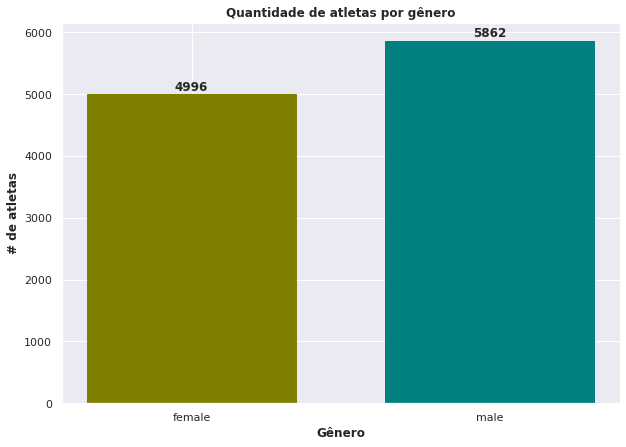

In [10]:
#Gráfico quantidade de atletas por gênero
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax  = fig.add_subplot(1, 1, 1)

barras = ax.bar(x = genero, height = valores, width = 0.7)
barras[0].set_color('olive')
barras[1].set_color('teal')

plt.title('Quantidade de atletas por gênero', fontweight = 'bold')
plt.xlabel('Gênero', fontweight = 'bold')
plt.ylabel('# de atletas', fontweight = 'bold')

for index, data in enumerate(valores):
  #plt.text(x = (index-0.04), y = (data*1.01), s = data, fontweight = 'bold', fontdict = dict(fontsize = 12))
  plt.text(x = index, y = (data*1.013), s = data, horizontalalignment = 'center', fontweight = 'bold', fontdict = dict(fontsize = 12))
plt.show()

O *dataset* possui mais atletas masculinos que femininos, com diferença de 866 pessoas entre si. Esse gráfico constata o que vemos tipicamente na Olimpíada em relação aos gêneros participantes. 

####Quantidade de atletas por idade

In [11]:
idade_atletas = df_copy['age'].groupby(df_copy.age).count()
idades = idade_atletas.index.array
quantidades = idade_atletas.array

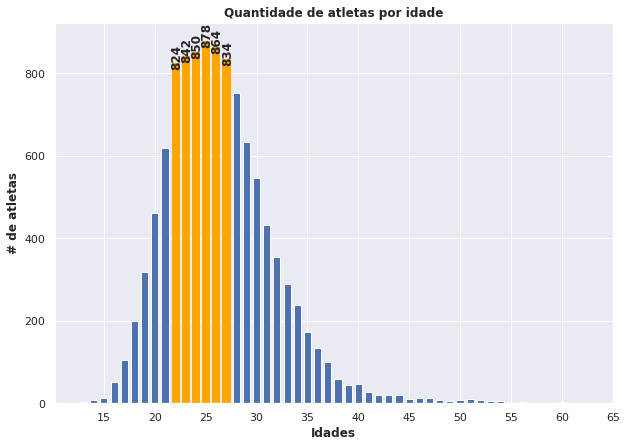

In [12]:
#Gráfico quantidade de atletas por idade
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

barras = ax.bar(x = idades, height = quantidades, width = 0.7)
barras[9].set_color('orange')
barras[10].set_color('orange')
barras[11].set_color('orange')
barras[12].set_color('orange')
barras[13].set_color('orange')
barras[14].set_color('orange')

plt.title('Quantidade de atletas por idade', fontweight = 'bold')
plt.xlabel('Idades', fontweight = 'bold')
plt.ylabel('# de atletas', fontweight = 'bold')

plt.xticks(np.arange(15, 70, step = 5))

for index, data in enumerate(quantidades):
  if 824 <= data <= 878:
    plt.text(x = (index+12.5), y = (data*0.99), s = data, rotation = '90', fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

Temos mais instâncias com idades de 22 a 27 anos, sendo que a idade com maior quantidade é 25. 

É interessante também que temos atletas olímpicos com idades de até quase 55 anos. O atleta mais novo neste dataset tem menos de 15 anos. 

####Quantidade de atletas por altura

In [13]:
altura_atletas = df_copy['height'].groupby(df_copy.height).count()
alturas = altura_atletas.index.array
valores = altura_atletas.array

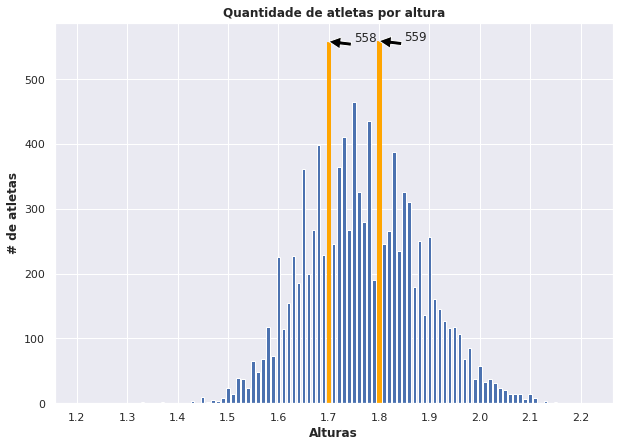

In [14]:
#Gráfico quantidade de atletas por altura
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

barras = ax.bar(x = alturas, height = valores, width = -0.007)
barras[34].set_color('orange')
barras[44].set_color('orange')

plt.title('Quantidade de atletas por altura', fontweight = 'bold')
plt.xlabel('Alturas', fontweight = 'bold')
plt.ylabel('# de atletas', fontweight = 'bold')

plt.xticks(np.arange(1.2, 2.21, step = 0.1))

plt.annotate('558', xy = (1.7, 558), xytext = (1.75, 558), arrowprops = dict(facecolor = 'black'))
plt.annotate('559', xy = (1.8, 559), xytext = (1.85, 559), arrowprops = dict(facecolor = 'black'))

plt.show()

As alturas que apresentam maior quantidade de atletas são 1,70cm (558) e 1,80cm (559). Esse comportamento talvez seja explicado pelo fato da maioria dos atletas serem do sexo masculino como mostrado anteriormente.

####Quantidade de atletas por peso

In [15]:
peso_atletas = df_copy['weight'].groupby(df_copy.weight).count()
pesos = peso_atletas.index.array
quantidades = peso_atletas.array

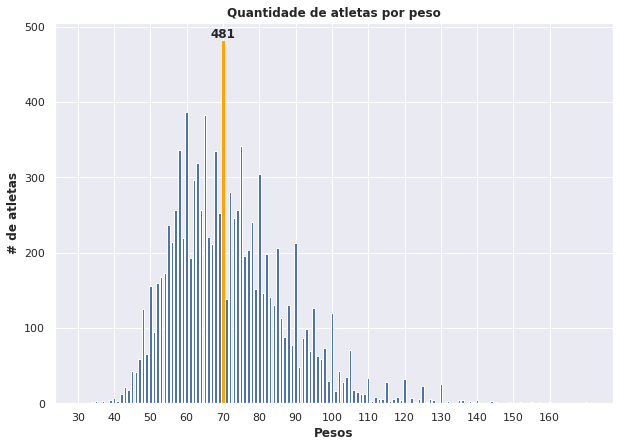

In [16]:
#Gráfico quantidade de atletas por peso
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

barras = ax.bar(x = pesos, height = quantidades, width = 0.7)
barras[37].set_color('orange')

plt.title('Quantidade de atletas por peso', fontweight = 'bold')
plt.xlabel('Pesos', fontweight = 'bold')
plt.ylabel('# de atletas', fontweight = 'bold')

plt.xticks(np.arange(30, 170, step = 10))

for index, data in enumerate(quantidades):
  if data == 481:
    plt.text(x = (index/0.555), y = (data*1.01), s = data, fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

O peso que apresenta maior quantidade de atletas é 70Kg (481).

####Quantidade de medalhas por categoria e por nacionalidade


In [17]:
def sum_medals(_df):
  lista = list()

  for index, row in _df.iterrows():
    cont = 0
    cont = row['gold'] + row['silver'] + row['bronze']
    lista.append(cont)

  return lista

In [18]:
df_agrupado_medalhas = df_copy[['gold', 'silver', 'bronze']].groupby(by=df_copy['nationality']).sum()
df_agrupado_medalhas['total'] = sum_medals(df_agrupado_medalhas)
df_agrupado_medalhas = df_agrupado_medalhas.sort_values('total', ascending= False).head(15)
df_agrupado_medalhas

,gold,silver,bronze,total
nationality,,,,
USA,136,52,70,258
GER,49,44,66,159
GBR,63,54,24,141
CHN,46,29,34,109
RUS,51,25,31,107
FRA,18,52,19,89
AUS,23,34,25,82
ITA,8,40,24,72
CAN,4,4,61,69


In [19]:
df_agrupado_medalhas.reset_index(inplace = True)
df_agrupado_medalhas.columns = ['nationality', 'gold', 'silver', 'bronze','total']

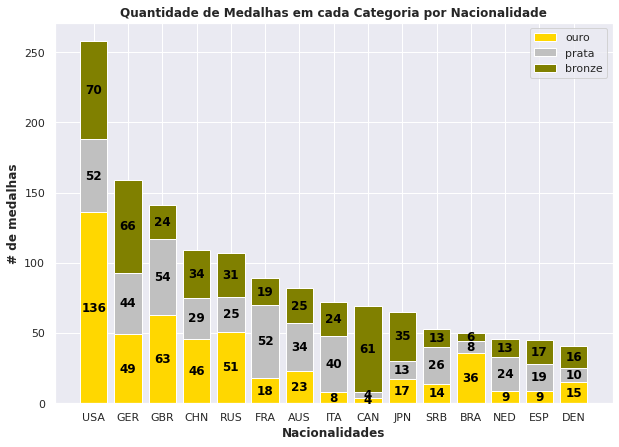

In [20]:
#Gráfico de quantidade de medalhas em cada categoria por nacionalidade
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

nacionalidades = ['USA', 'GER', 'GBR', 'CHN', 'RUS', 'FRA', 'AUS', 'ITA', 'CAN', 'JPN', 'SRB', 'BRA', 'NED', 'ESP', 'DEN']
ouro = [136, 49, 63, 46, 51, 18, 23, 8, 4, 17, 14, 36, 9, 9, 15]
prata = [52, 44, 54, 29, 25, 52, 34, 40, 4, 13, 26, 8, 24, 19, 10]
bronze = [70, 66, 24, 34, 31, 19, 25, 24, 61, 35, 13, 6, 13, 17, 16]

ax1 = ax.bar(x = nacionalidades, height = ouro, label = 'ouro', color = 'gold')
ax2 = ax.bar(x = nacionalidades, height = prata, label = 'prata', bottom = ouro, color = 'silver')
ax3 = ax.bar(x = nacionalidades, height = bronze, label = 'bronze', bottom = np.array(ouro) + np.array(prata), color = 'olive')


plt.title('Quantidade de Medalhas em cada Categoria por Nacionalidade', fontweight = 'bold')
plt.xlabel('Nacionalidades', fontweight = 'bold')
plt.ylabel('# de medalhas', fontweight = 'bold')

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()

    if h1 != 0:
      plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%d' % h1, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    if h2 != 0:
      plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%d' % h2, ha ='center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    if h3 != 0:  
      plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., '%d' % h3, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')

plt.legend()
plt.show()

As nacionalidades que apresentam maiores quantidades de medalhas, em sua totalidade, são Estados Unidos, Alemanha, Grã-Bretanha, China e Rússia. Estes são os únicos países cujas contagens alcançam o terceiro dígito.

#### Quantidade de medalhas vencidas por agrupamentos

In [21]:
def sum_count (_df, coluna1, coluna2, coluna3, condicao):
  cont = 0
  
  if (condicao == 1):  #apenas um tipo de medalha, as demais são 0
    for index, row in _df.iterrows():
      if( row[coluna1] > 0 and row[coluna2] == 0 and row[coluna3] == 0):
        cont = cont + 1
  elif (condicao == 2): #conta duas medalhas
    for index, row in _df.iterrows():
      if( row[coluna1] > 0 and row[coluna2] > 0 and row[coluna3] == 0):
        cont = cont + 1
  elif (condicao == 3):
    for index, row in _df.iterrows():
      if( row[coluna1] > 0 and row[coluna2] > 0 and row[coluna3] > 0):
        cont = cont + 1
  else: 
    #ganhou nenhuma medalha
    for index, row in _df.iterrows():
      if( row[coluna1] == 0 and row[coluna2] == 0 and row[coluna3] == 0):
        cont = cont + 1

  return cont

Qntde. de atletas que receberam somente uma das 3 medalhas:



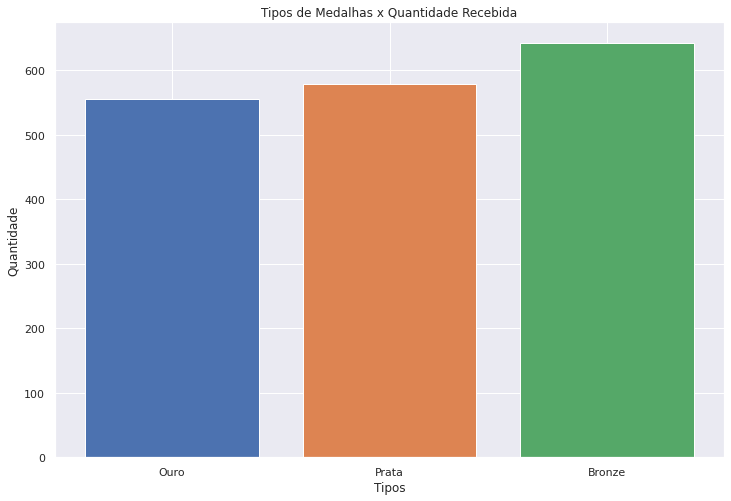

In [22]:
#Gráfico com quantidade de medalhas por atleta
#Recebido somente um tipo de medalha.

print("Qntde. de atletas que receberam somente uma das 3 medalhas:\n")

plt.bar("Ouro", sum_count(dataset, "gold", "silver", "bronze", 1))

plt.bar("Prata", sum_count(dataset, "silver", "gold", "bronze", 1))

plt.bar("Bronze", sum_count(dataset, "bronze", "gold", "silver", 1))

plt.xlabel('Tipos')
plt.ylabel('Quantidade')

plt.title('Tipos de Medalhas x Quantidade Recebida')

plt.show()

Comparando os dados no gráfico acima, verificamos que temos em maior quantidade atletas que receberam somente medalhas de bronze durante toda a Olimpíada. 

Qntde. de atletas que receberam mais de um tipo de medalha:



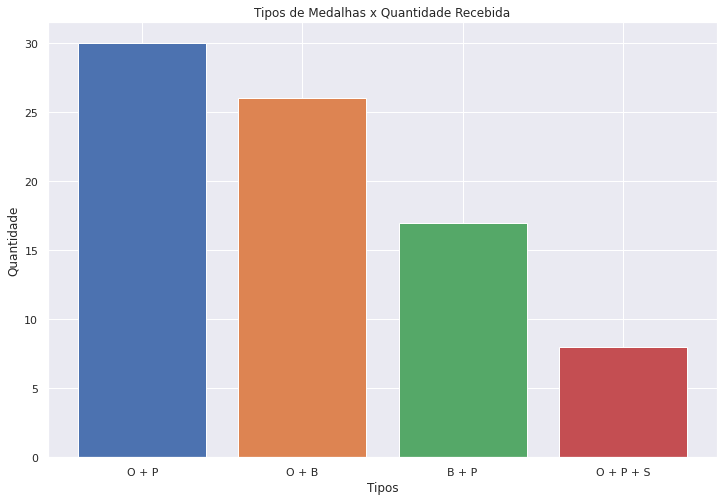

In [23]:
print("Qntde. de atletas que receberam mais de um tipo de medalha:\n")

plt.bar("O + P", sum_count(dataset, "gold", "silver", "bronze", 2))

plt.bar("O + B", sum_count(dataset, "gold", "bronze", "silver", 2))

plt.bar("B + P", sum_count(dataset, "silver", "bronze", "gold", 2))

plt.bar("O + P + S", sum_count(dataset, "gold", "bronze", "silver", 3))

plt.xlabel('Tipos')
plt.ylabel('Quantidade')

plt.title('Tipos de Medalhas x Quantidade Recebida')

plt.show()

O gráfico acima mostra que temos 30 atletas que receberam medalhas de ouro e prata. É a maior contagem, seguida de ouro e bronze, prata e bronze, e a combinação das 3 medalhas. 

Ainda foi descoberto que temos mais de 9 mil e 500 atletas que não receberam nenhuma medalha.

In [24]:
print("Quantia de Atletas que receberam nenhuma medalha:", sum_count(dataset, "bronze", "gold", "silver", 4))

Quantia de Atletas que receberam nenhuma medalha: 9681


#### TOP 10 de Nacionalidades x Qntd. de Atletas

In [25]:
#Dataframe contendo a quantidade ascendente de cada nacionalidade
df_paises = dataset['nationality'].value_counts().to_frame()
df_paises = df_paises.rename(columns = {'nationality':'qntd'})
df_paises['nationality'] = df_paises.index
df_paises.reset_index(drop=True, inplace=True)
df_paises = df_paises[['nationality','qntd']]
df_paises.sort_values(ascending=False, inplace=True, by='qntd')

<Figure size 864x576 with 0 Axes>

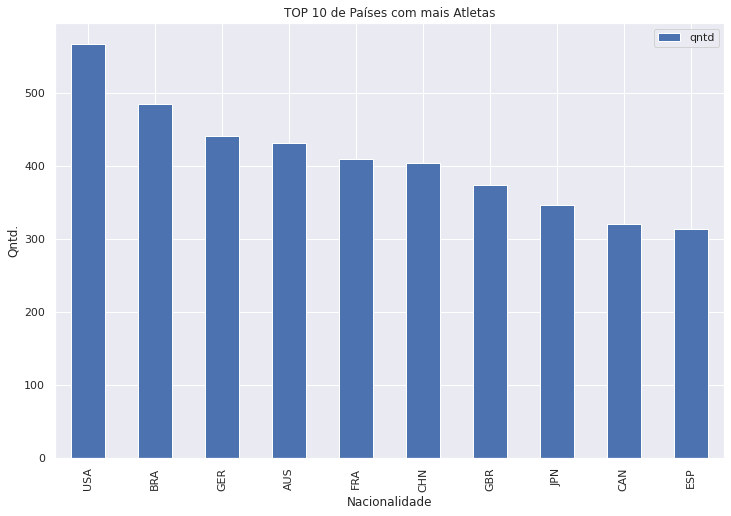

In [26]:
#Gráfico com TOP 10 de nacionalidades com mais atletas
fig = plt.figure(figsize = (12, 8)) 
df_paises.head(10).plot(kind='bar', x='nationality', y='qntd')
plt.xlabel('Nacionalidade')
plt.ylabel('Qntd.')
plt.title('TOP 10 de Países com mais Atletas')
plt.show()

Estados Unidos, Brasil, Alemanha, Austrália, França e China possuem maiores quantidades de atletas presentes nos Jogos Olímpicos, sendo que existem mais de 500 atletas estadunidenses.

A presença dos Estados Unidos, Alemanha, China e Grã-Bretanha neste TOP 10 pode ser correlacionada com a classificação quantitativa de medalhas na sessão anterior. 

<Figure size 864x576 with 0 Axes>

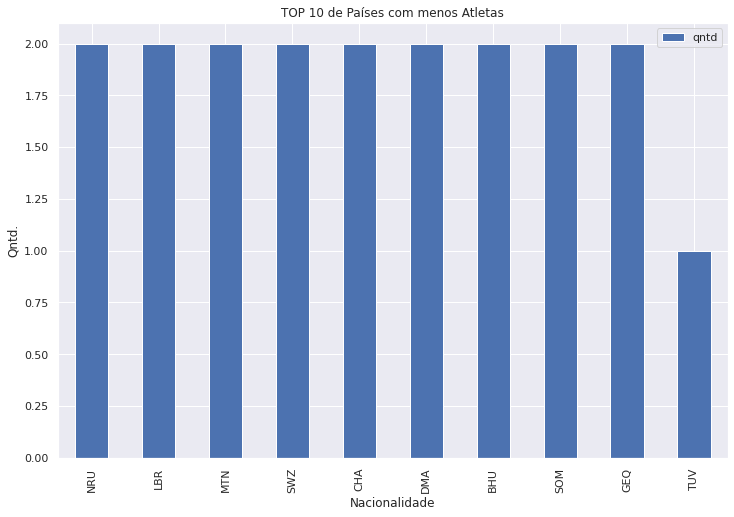

In [27]:
#Gráfico com TOP 10 de nacionalidades com menos atletas
fig = plt.figure(figsize = (12, 8)) 
df_paises.tail(10).plot(kind='bar', x='nationality', y='qntd')
plt.xlabel('Nacionalidade')
plt.ylabel('Qntd.')
plt.title('TOP 10 de Países com menos Atletas')
plt.show()

Com o gráfico acima, podemos ver que o país com menor quantidade de atletas olímpicos é Tuvalu (qntd = 1). Os demais países apresentam 2 atletas, cada. 

#### Quantidade de atletas por esporte

In [28]:
esporte_atletas = df_copy['sport'].groupby(df_copy.sport).count()
esporte_atletas

sport
aquatics             1396
archery               126
athletics            2187
badminton             164
basketball            284
canoe                 327
cycling               502
equestrian            215
fencing               245
football              583
golf                  115
gymnastics            319
handball              349
hockey                432
judo                  377
modern pentathlon      72
rowing                535
rugby sevens          296
sailing               372
shooting              380
table tennis          168
taekwondo             125
tennis                191
triathlon             109
volleyball            382
weightlifting         258
wrestling             349
Name: sport, dtype: int64

In [29]:
esportes = esporte_atletas.index.array
esportes

<PandasArray>
[         'aquatics',           'archery',         'athletics',
         'badminton',        'basketball',             'canoe',
           'cycling',        'equestrian',           'fencing',
          'football',              'golf',        'gymnastics',
          'handball',            'hockey',              'judo',
 'modern pentathlon',            'rowing',      'rugby sevens',
           'sailing',          'shooting',      'table tennis',
         'taekwondo',            'tennis',         'triathlon',
        'volleyball',     'weightlifting',         'wrestling']
Length: 27, dtype: object

In [30]:
quantidades = esporte_atletas.array
quantidades

<PandasArray>
[1396,  126, 2187,  164,  284,  327,  502,  215,  245,  583,  115,  319,  349,
  432,  377,   72,  535,  296,  372,  380,  168,  125,  191,  109,  382,  258,
  349]
Length: 27, dtype: int64

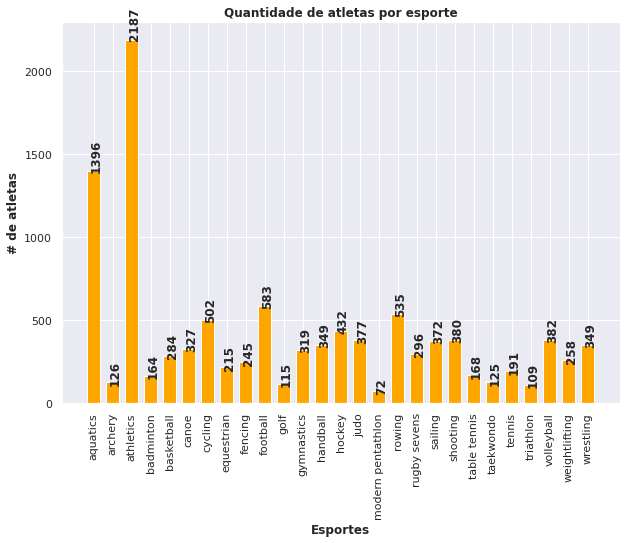

In [31]:
#Gráfico quantidade de atletas por esporte
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

ax.bar(x = esportes, height = quantidades, width = 0.7, color = 'orange')

plt.title('Quantidade de atletas por esporte', fontweight = 'bold')
plt.xlabel('Esportes', fontweight = 'bold')
plt.ylabel('# de atletas', fontweight = 'bold')
plt.xticks(rotation = 90)

for index, data in enumerate(quantidades):
    plt.text(x = (index-0.2), y = (data*1.01), s = data, rotation = '90', fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

Os esportes com mais atletas são aquáticos (1396) e atletismo (2187). Isso pode estar relacionado com os resultados referentes a altura mostrados anteriormente, já que atletas de ambos os esportes costumam ser altos.

#### Quantidade de medalhas por categoria e por esporte

In [32]:
df_agrupado_medalhas = df_copy[['gold', 'silver', 'bronze']].groupby(by=df_copy['sport']).sum()
df_agrupado_medalhas['total'] = sum_medals(df_agrupado_medalhas)
df_agrupado_medalhas = df_agrupado_medalhas.sort_values('total', ascending= False).head(15)
df_agrupado_medalhas

,gold,silver,bronze,total
sport,,,,
aquatics,119,110,106,335
athletics,64,61,58,183
rowing,48,48,44,140
hockey,34,32,33,99
football,36,36,18,90
gymnastics,30,30,30,90
cycling,27,27,29,83
volleyball,28,27,28,83
canoe,27,27,28,82


In [33]:
df_agrupado_medalhas.reset_index(inplace = True)
df_agrupado_medalhas.columns = ['sport', 'gold', 'silver', 'bronze','total']
df_agrupado_medalhas.values

array([['aquatics', 119, 110, 106, 335],
       ['athletics', 64, 61, 58, 183],
       ['rowing', 48, 48, 44, 140],
       ['hockey', 34, 32, 33, 99],
       ['football', 36, 36, 18, 90],
       ['gymnastics', 30, 30, 30, 90],
       ['cycling', 27, 27, 29, 83],
       ['volleyball', 28, 27, 28, 83],
       ['canoe', 27, 27, 28, 82],
       ['handball', 29, 30, 15, 74],
       ['rugby sevens', 25, 24, 25, 74],
       ['basketball', 24, 24, 24, 72],
       ['wrestling', 18, 18, 35, 71],
       ['fencing', 21, 22, 22, 65],
       ['judo', 14, 14, 28, 56]], dtype=object)

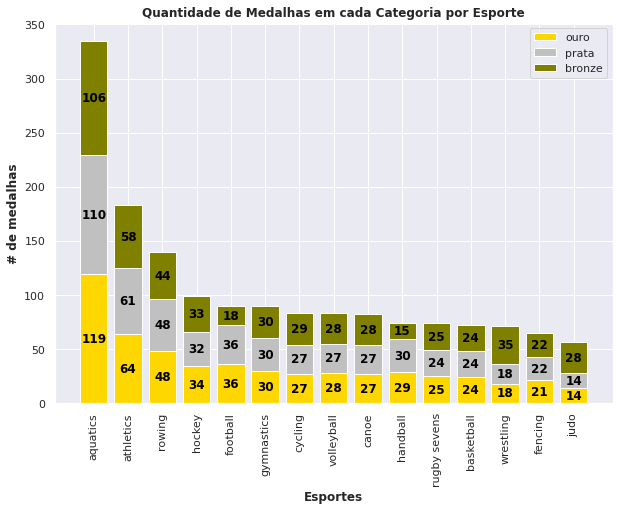

In [34]:
#Gráfico de quantidade de medalhas em cada categoria por esporte
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

esportes = ['aquatics', 'athletics', 'rowing', 'hockey', 'football', 'gymnastics', 'cycling', 'volleyball', 'canoe', 'handball', 'rugby sevens', 'basketball', 'wrestling', 'fencing', 'judo']
ouro = [119, 64, 48, 34, 36, 30, 27, 28, 27, 29, 25, 24, 18, 21, 14]
prata = [110, 61, 48, 32, 36, 30, 27, 27, 27, 30, 24, 24, 18, 22, 14]
bronze = [106, 58, 44, 33, 18, 30, 29, 28, 28, 15, 25, 24, 35, 22, 28]

ax1 = ax.bar(x = esportes, height = ouro, label = 'ouro', color = 'gold')
ax2 = ax.bar(x = esportes, height = prata, label = 'prata', bottom = ouro, color = 'silver')
ax3 = ax.bar(x = esportes, height = bronze, label = 'bronze', bottom = np.array(ouro) + np.array(prata), color = 'olive')

plt.title('Quantidade de Medalhas em cada Categoria por Esporte', fontweight = 'bold')
plt.xlabel('Esportes', fontweight = 'bold')
plt.ylabel('# de medalhas', fontweight = 'bold')
plt.xticks(rotation = 90)

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()

    if h1 != 0:
      plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%d' % h1, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    if h2 != 0:
      plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%d' % h2, ha ='center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    if h3 != 0:  
      plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., '%d' % h3, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')

plt.legend()
plt.show()

Os esportes com mais medalhas são aquáticos (335) e atletismo (183). Esse comportamento pode ter sido influenciado pelo fato desses dois esportes serem também aqueles que possuem a maior quantidades de atletas como mostrado anteriormente.

##Calcular a média, mediana, moda, desvio-padrão, coeficiente de variação e simetria das variáveis quantitativas

In [35]:
#Função que calcula o coeficiente de variância, dado um conjunto de dados unidimensional 

def cv(n):
  return round(100*st.stdev(n)/st.mean(n), 2)

### Base geral

In [36]:
#Dataframe que contém informações estatísticas básicas do dataset
df_stats = pd.DataFrame({
    'coluna':['Idade (age)', 'Altura (height)', 'Peso (weight)'],
    'media':[round(st.mean(df_copy.age),5 ), round(st.mean(df_copy.height),5 ), round(st.mean(df_copy.weight),5 )],
    'mediana':[st.median(df_copy.age), st.median(df_copy.height), st.median(df_copy.weight)],
    'moda':[st.mode(df_copy.age), st.mode(df_copy.height), st.mode(df_copy.weight)],
    'd-p':[round(st.pstdev(df_copy.age), 2 ), round(st.pstdev(df_copy.height), 2 ), round(st.pstdev(df_copy.weight), 2 )],
    'c-v':[cv(df_copy.age), cv(df_copy.height), cv(df_copy.weight)],
    'simetria':[round(df_copy.age.skew(), 5), round(df_copy.height.skew(), 5), round(df_copy.weight.skew(), 5)]
})

In [37]:
#Tabela de dados estatísticos do dataset.
df_stats

,coluna,media,mediana,moda,d-p,c-v,simetria
0,Idade (age),26.41177,26.00,25.0,5.40,20.43,1.11795
1,Altura (height),1.76694,1.76,1.8,0.11,6.40,0.16531
2,Peso (weight),72.07092,70.00,70.0,16.16,22.43,1.05906


* Idade:
 * Media > Mediana < Moda
* Altura:
 * Media > Mediana < Moda
* Peso:
 * Media > Mediana = Moda

### Base com sexo masculino

In [38]:
df_men =  df_copy[df_copy.sex == 'male']
df_stats_men = pd.DataFrame({
    'coluna':['Idade (age)', 'Altura (height)', 'Peso (weight)'],
    'media':[round(st.mean(df_men.age),5 ), round(st.mean(df_men.height),5 ), round(st.mean(df_men.weight),5 )],
    'mediana':[st.median(df_men.age), st.median(df_men.height), st.median(df_men.weight)],
    'moda':[st.mode(df_men.age), st.mode(df_men.height), st.mode(df_men.weight)],
    'd-p':[round(st.pstdev(df_men.age), 2 ), round(st.pstdev(df_men.height), 2 ), round(st.pstdev(df_men.weight), 2 )],
    'c-v':[cv(df_men.age), cv(df_men.height), cv(df_men.weight)],
    'simetria':[round(df_men.age.skew(), 5), round(df_men.height.skew(), 5), round(df_men.weight.skew(), 5)]
})

In [39]:
#Tabela de dados estatísticos do dataset do sexo masculino.
df_stats_men

,coluna,media,mediana,moda,d-p,c-v,simetria
0,Idade (age),26.88383,26.00,26.0,5.48,20.37,1.22447
1,Altura (height),1.82387,1.82,1.8,0.10,5.49,0.05981
2,Peso (weight),80.11873,78.00,70.0,15.38,19.20,1.12085


* Idade:
 * Media > Mediana = Moda
* Altura:
 * Media = Mediana = Moda
* Peso:
 * Media > Mediana > Moda





### Base com sexo feminino

In [40]:
df_women =  df_copy[df_copy.sex == 'female']
df_stats_women = pd.DataFrame({
    'coluna':['Idade (age)', 'Altura (height)', 'Peso (weight)'],
    'media':[round(st.mean(df_women.age),2 ), round(st.mean(df_women.height),2 ), round(st.mean(df_women.weight),2 )],
    'mediana':[round(st.median(df_women.age), 2), round(st.median(df_women.height), 2), round(st.median(df_women.weight), 2)],
    'moda':[round(st.mode(df_women.age), 2), round(st.mode(df_women.height), 2), round(st.mode(df_women.weight), 2)],
    'd-p':[round(st.pstdev(df_women.age), 2 ), round(st.pstdev(df_women.height), 2 ), round(st.pstdev(df_women.weight), 2 )],
    'c-v':[cv(df_women.age), cv(df_women.height), cv(df_women.weight)],
    'simetria':[round(df_women.age.skew(), 5), round(df_women.height.skew(), 5), round(df_women.weight.skew(), 5)]
})

In [41]:
#Tabela de dados estatísticos do dataset do sexo feminino.
df_stats_women

,coluna,media,mediana,moda,d-p,c-v,simetria
0,Idade (age),25.86,25.0,25.0,5.24,20.28,0.98152
1,Altura (height),1.70,1.7,1.7,0.09,5.19,0.11376
2,Peso (weight),62.63,61.0,58.0,11.18,17.85,1.43449


* Idade:
 * Media > Mediana = Moda
* Altura:
 * Media = Mediana = Moda
* Peso:
 * Media > Mediana > Moda


##Analisar a normalidade dos dados numéricos e se existe a presença de outliers

####Idade

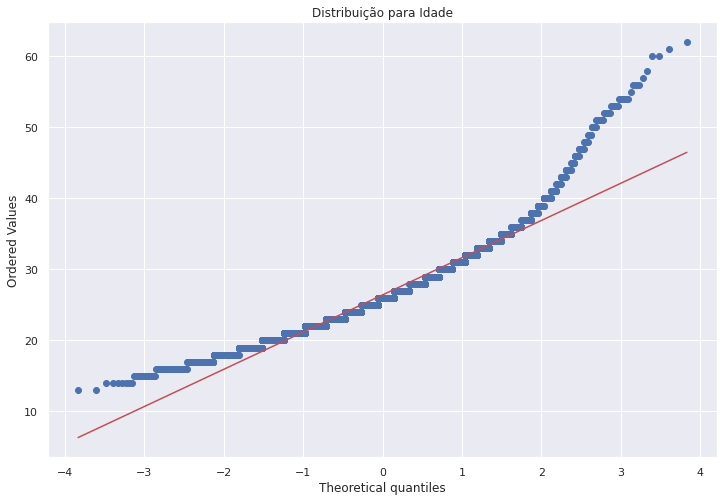

In [42]:
# Geração de gráfico para verificar se a distribuição é normal
# idade
fig, ax = plt.subplots()
stats.probplot(df_copy.age, fit=True, plot=ax)
plt.title("Distribuição para Idade")
plt.show()

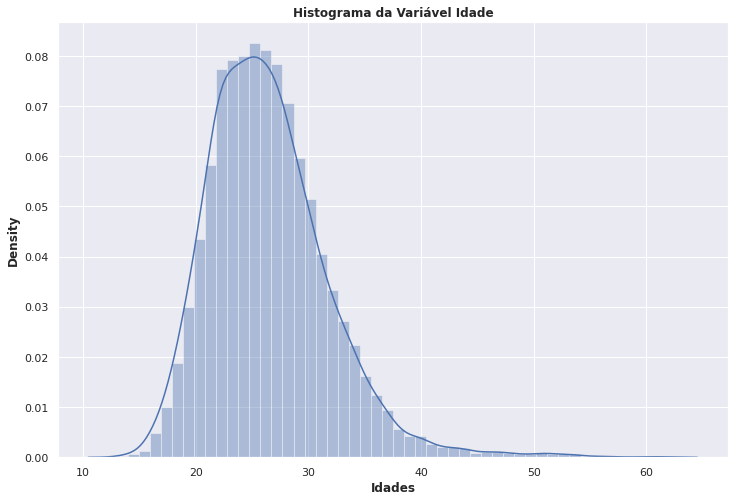

In [43]:
#Histograma da Variável Idade
sns.distplot(df_copy.age);

plt.title('Histograma da Variável Idade', fontdict={'fontweight' : 'bold'});
plt.xlabel('Idades', fontweight = 'bold');
plt.ylabel(ylabel = 'Density', fontweight = 'bold');

In [44]:
# Execução do teste de Shapiro Wilk
# Primeiro valor é o resultado da estatística e o segundo argumento é o valor de p.
# Ho = Os dados apresentam distribuição
# H1 = Os dados não apresentam distribuição normal
# Se o segundo termo (p-valor) é menor que 0,05 (5%) rejeita-se a hipótese nula.
stats.shapiro(df_copy.age)

(0.9433720707893372, 0.0)

Rejeita-se a hipótese nula (H0), pois o p-valor é menor que 0,05. Logo, os dados não apresentam distribuição normal.

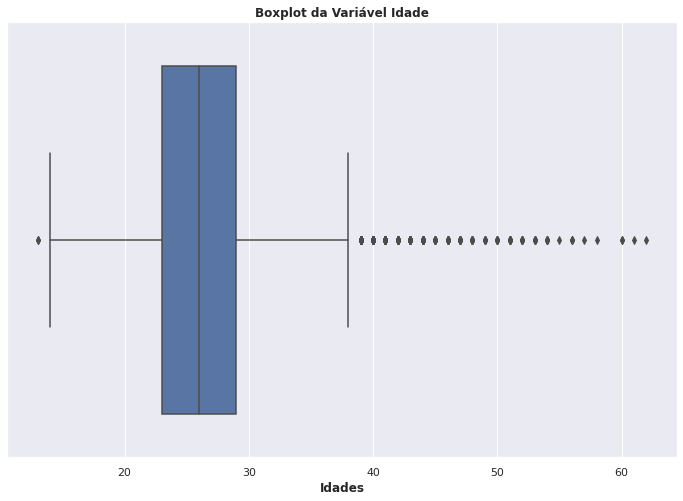

In [45]:
#Boxplot da Variável Idade
sns.boxplot(df_copy.age);

plt.title('Boxplot da Variável Idade', fontdict={'fontweight' : 'bold'});
plt.xlabel('Idades', fontweight = 'bold');

####Altura

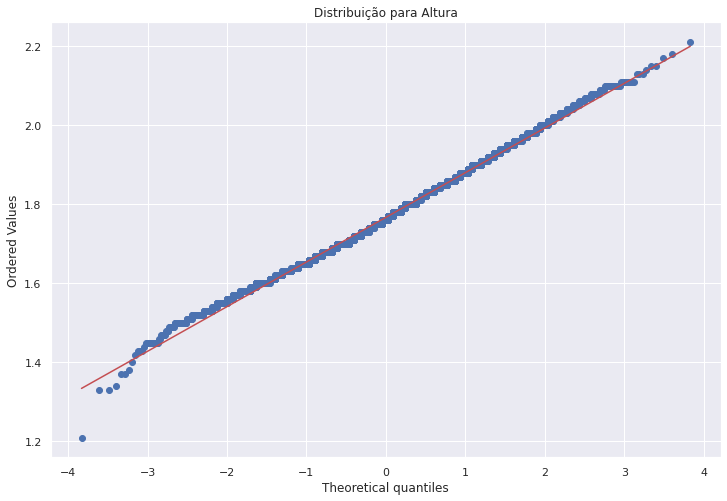

In [46]:
# Geração de gráfico para verificar se a distribuição é normal
# altura
fig, ax = plt.subplots()
stats.probplot(df_copy.height, fit=True, plot=ax)
plt.title("Distribuição para Altura")
plt.show()

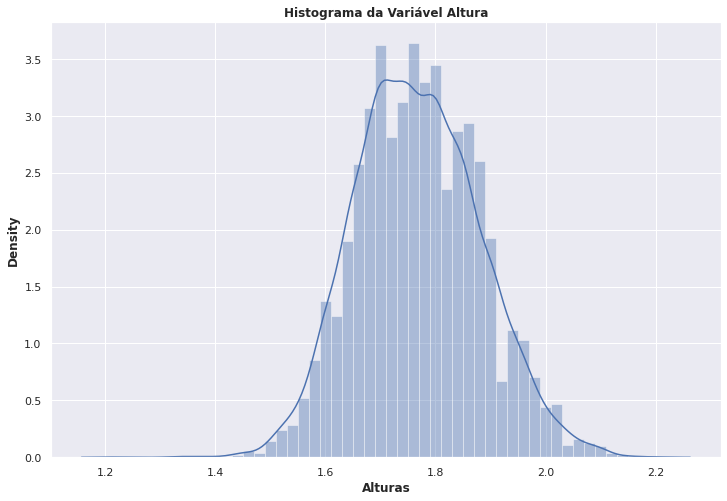

In [47]:
#Histograma da Variável Altura
sns.distplot(df_copy.height);

plt.title('Histograma da Variável Altura', fontdict={'fontweight' : 'bold'});
plt.xlabel('Alturas', fontweight = 'bold');
plt.ylabel(ylabel = 'Density', fontweight = 'bold');

In [48]:
# Execução do teste de Shapiro Wilk
# Primeiro valor é o resultado da estatística e o segundo argumento é o valor de p.
# Ho = Os dados apresentam distribuição
# H1 = Os dados não apresentam distribuição normal
# Se o segundo termo (p-valor) é menor que 0,05 (5%) rejeita-se a hipótese nula.
stats.shapiro(df_copy.height)

(0.9965190291404724, 2.1925333490229685e-15)

Rejeita-se a hipótese nula (H0), pois o p-valor é menor que 0,05. Logo, os dados não apresentam distribuição normal.

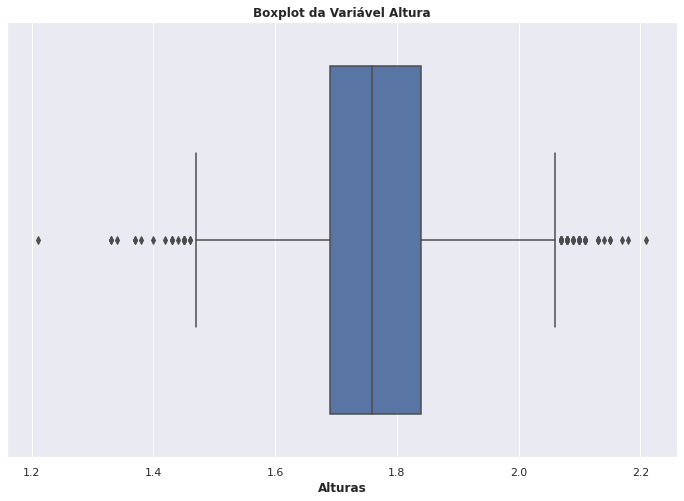

In [49]:
#Boxplot da Variável Altura
sns.boxplot(df_copy.height);

plt.title('Boxplot da Variável Altura', fontdict={'fontweight' : 'bold'});
plt.xlabel('Alturas', fontweight = 'bold');

####Peso

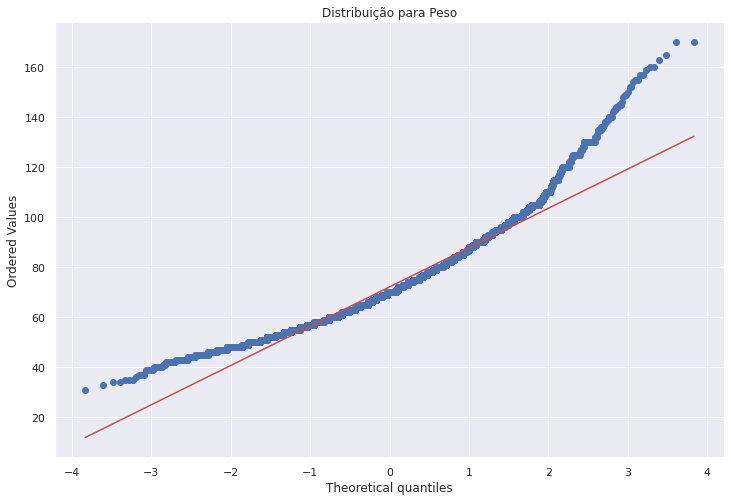

In [50]:
# Geração de gráfico para verificar se a distribuição é normal
# peso
fig, ax = plt.subplots()
stats.probplot(df_copy.weight, fit=True, plot=ax)
plt.title("Distribuição para Peso")
plt.show()

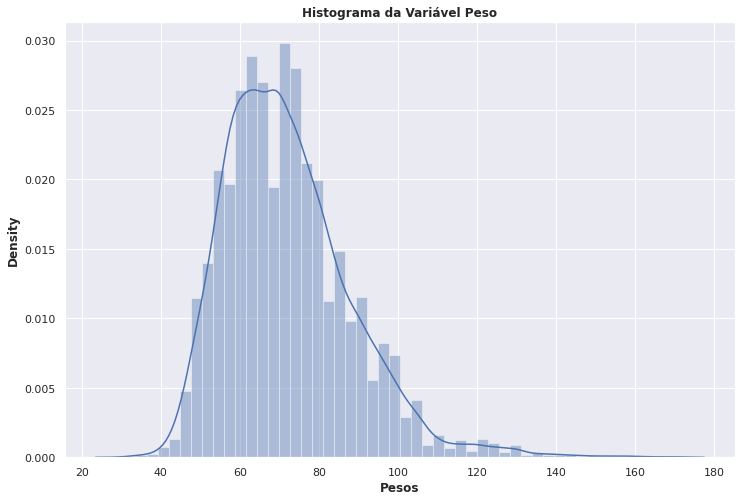

In [51]:
#Histograma da Variável Peso
sns.distplot(df_copy.weight);

plt.title('Histograma da Variável Peso', fontdict={'fontweight' : 'bold'});
plt.xlabel('Pesos', fontweight = 'bold');
plt.ylabel(ylabel = 'Density', fontweight = 'bold');

In [52]:
# Execução do teste de Shapiro Wilk
# Primeiro valor é o resultado da estatística e o segundo argumento é o valor de p.
# Ho = Os dados apresentam distribuição
# H1 = Os dados não apresentam distribuição normal
# Se o segundo termo (p-valor) é menor que 0,05 (5%) rejeita-se a hipótese nula.
stats.shapiro(df_copy.weight)

(0.9469754099845886, 0.0)

Rejeita-se a hipótese nula (H0), pois o p-valor é menor que 0,05. Logo, os dados não apresentam distribuição normal.

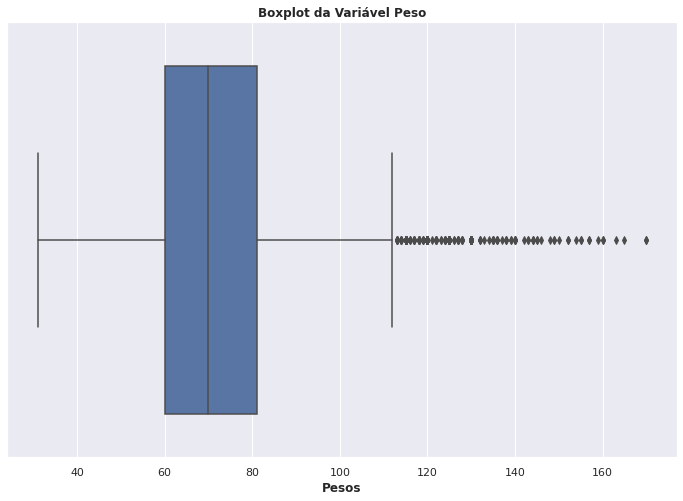

In [53]:
#Boxplot da Variável Peso
sns.boxplot(df_copy.weight);

plt.title('Boxplot da Variável Peso', fontdict={'fontweight' : 'bold'});
plt.xlabel('Pesos', fontweight = 'bold');

##Comparar as variáveis quantitativas e descrever qual é mais homogênea;

In [54]:
df_stats

,coluna,media,mediana,moda,d-p,c-v,simetria
0,Idade (age),26.41177,26.00,25.0,5.40,20.43,1.11795
1,Altura (height),1.76694,1.76,1.8,0.11,6.40,0.16531
2,Peso (weight),72.07092,70.00,70.0,16.16,22.43,1.05906


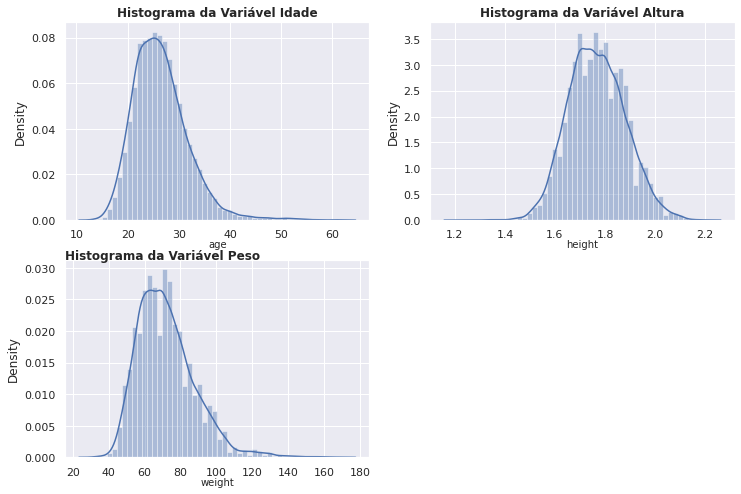

In [55]:
#Histograma de idade, altura e peso
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
sns.distplot(df_copy.age, ax = ax1)
ax1.set_xlabel(xlabel = 'age', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Histograma da Variável Idade', fontdict={'fontweight' : 'bold'})

ax2 = fig.add_subplot(2,2,2)
sns.distplot(df_copy.height, ax = ax2)
ax2.set_xlabel(xlabel = 'height', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Histograma da Variável Altura', fontdict={'fontweight' : 'bold'})

ax3 = fig.add_subplot(2,2,3)
sns.distplot(df_copy.weight, ax = ax3)
ax3.set_xlabel(xlabel = 'weight', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Histograma da Variável Peso', loc = 'left', pad = 0.01, fontdict={'fontweight' : 'bold'})

plt.show()

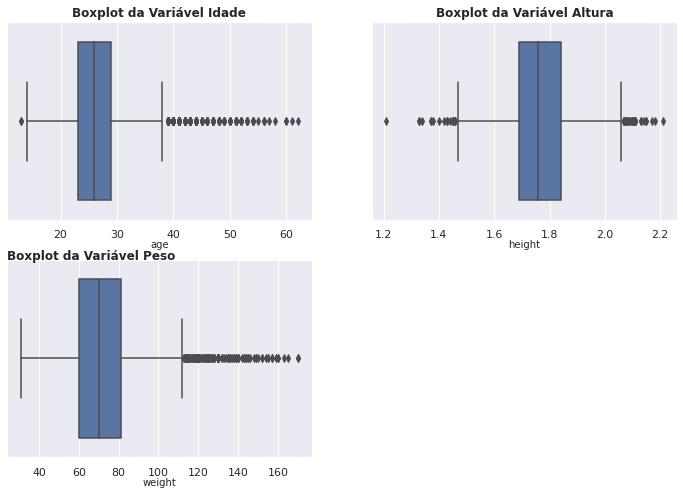

In [56]:
#Boxplot de idade, altura e peso
fig = plt.figure()

ax1 =fig.add_subplot(2,2,1)
sns.boxplot(df_copy.age, ax = ax1)
ax1.set_xlabel(xlabel = 'age', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Boxplot da Variável Idade', fontdict={'fontweight' : 'bold'})

ax2 =fig.add_subplot(2,2,2)
sns.boxplot(df_copy.height, ax = ax2)
ax2.set_xlabel(xlabel = 'height', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Boxplot da Variável Altura', fontdict={'fontweight' : 'bold'})

ax3 =fig.add_subplot(2,2,3)
sns.boxplot(df_copy.weight, ax = ax3)
ax3.set_xlabel(xlabel = 'weight', labelpad = 0.01, fontdict={'fontsize': 10})
plt.title('Boxplot da Variável Peso', loc = 'left', pad = 0.01, fontdict={'fontweight' : 'bold'})

plt.show()

Conclusão:
*   Todas as variáveis numéricas possuem *outliers*, porém, somente a variável peso possui *outliers* na extremidade superior. 
*   Estes *outliers* podem indicar características incomuns em atletas participantes de Jogos Olímpicos, que mostram oposição a, como por exemplo: melhores faixas de peso e altura para esportes específicos, faixa de idade que geralmente denotam o pico da capacidade humana na prática de algum esporte, ou que iniciam carreira olímpica na faixa dos 20 anos, etc.
*   Todas as variáveis numéricas não apresentam distribuição normal, como pode ser visto nos testes realizados e gráficos gerados. 

##Calcular os respectivos Intervalos de Confiança ao nível de 95% para cada campo do data frame

In [57]:
#IC95% para a variável *age*

inf, sup = norm.interval(0.95, loc = round(st.mean(df_copy.age),2 ), scale = round(st.pstdev(df_copy.age), 2 ) / np.sqrt(len(df_copy.age)) )

print ('Limite inferior de Idade:', round(inf, 5) )
print ('Limite superior de Idade:', round(sup, 5) )

Limite inferior de Idade: 26.30843
Limite superior de Idade: 26.51157


In [58]:
#IC95% para a variável *height*

inf, sup = norm.interval(0.95, loc = round(st.mean(df_copy.height),2 ), scale = round(st.pstdev(df_copy.height), 2 ) / np.sqrt(len(df_copy.height)) )

print ('Limite inferior de Altura:', round(inf, 5) )
print ('Limite superior de Altura:', round(sup, 5) )

Limite inferior de Altura: 1.76793
Limite superior de Altura: 1.77207


In [59]:
#IC95% para a variável *weight*

inf, sup = norm.interval(0.95, loc = round(st.mean(df_copy.weight),2 ), scale = round(st.pstdev(df_copy.weight), 2 ) / np.sqrt(len(df_copy.weight)) )

print ('Limite inferior de Peso:', round(inf, 5) )
print ('Limite superior de Peso:', round(sup, 5) )

Limite inferior de Peso: 71.76604
Limite superior de Peso: 72.37396


##Comparar a média de um campo numérico em relação a um campo categórico e responder se existe diferença estatística ao nível de 5% de significância

In [60]:
novo_df = df_copy[df_copy.sport == 'aquatics']
novo_df

,nationality,sex,height,weight,sport,gold,silver,bronze,age
7,AUS,male,1.93,100.0,aquatics,0,0,0,24
14,USA,female,1.78,68.0,aquatics,1,1,0,19
26,SUD,male,1.81,72.0,aquatics,0,0,0,21
45,SEN,male,1.90,90.0,aquatics,0,0,0,27
64,USA,female,1.66,61.0,aquatics,0,0,0,26
...,...,...,...,...,...,...,...,...,...
11500,ISR,male,1.85,71.0,aquatics,0,0,0,19
11503,SRB,male,1.93,93.0,aquatics,1,0,0,33
11507,AUS,female,1.70,70.0,aquatics,0,0,0,25
11512,ISR,female,1.78,61.0,aquatics,0,0,0,19


In [61]:
novo_df['total'] = sum_medals(novo_df)
novo_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,nationality,sex,height,weight,sport,gold,silver,bronze,age,total
7,AUS,male,1.93,100.0,aquatics,0,0,0,24,0
14,USA,female,1.78,68.0,aquatics,1,1,0,19,2
26,SUD,male,1.81,72.0,aquatics,0,0,0,21,0
45,SEN,male,1.90,90.0,aquatics,0,0,0,27,0
64,USA,female,1.66,61.0,aquatics,0,0,0,26,0
...,...,...,...,...,...,...,...,...,...,...
11500,ISR,male,1.85,71.0,aquatics,0,0,0,19,0
11503,SRB,male,1.93,93.0,aquatics,1,0,0,33,1
11507,AUS,female,1.70,70.0,aquatics,0,0,0,25,0
11512,ISR,female,1.78,61.0,aquatics,0,0,0,19,0


In [62]:
novo_df['total'][novo_df.total > 0].groupby(novo_df.sex).sum()

sex
female    185
male      150
Name: total, dtype: int64

In [63]:
tab_contigencia = pd.crosstab(novo_df.sex,novo_df.total)
tab_contigencia

total,0,1,2,3,4,5,6
sex,,,,,,,
female,556,108,23,2,5,1,0
male,583,95,18,3,1,0,1


In [64]:
qui, p, gl, esperado = chi2_contingency(tab_contigencia,correction=False)
print("Valores esperados")
print(esperado)
print('qui=%.3f, p=%.3f' % (qui, p))
if p > 0.05:
	print('Conclusão: as variáveis são independentes')
else:
	print('Conclusão: as variáveis são dependentes')

Valores esperados
[[5.67052292e+02 1.01063754e+02 2.04118911e+01 2.48925501e+00
  2.98710602e+00 4.97851003e-01 4.97851003e-01]
 [5.71947708e+02 1.01936246e+02 2.05881089e+01 2.51074499e+00
  3.01289398e+00 5.02148997e-01 5.02148997e-01]]
qui=6.923, p=0.328
Conclusão: as variáveis são independentes


Consideramos apenas o esporte aquático em relação ao gênero.

##Realizar um cruzamento de dois campos categóricos e responder se existe diferença estatística ao nível de 5% de significância

In [65]:
df_copy['total'] = sum_medals(df_copy)
df_copy

,nationality,sex,height,weight,sport,gold,silver,bronze,age,total
0,ESP,male,1.72,64.0,athletics,0,0,0,46,0
1,KOR,female,1.68,56.0,fencing,0,0,0,29,0
2,CAN,male,1.98,79.0,athletics,0,0,1,24,1
3,MDA,male,1.83,80.0,taekwondo,0,0,0,25,0
4,NZL,male,1.81,71.0,cycling,0,0,0,25,0
...,...,...,...,...,...,...,...,...,...,...
11533,CUB,female,1.64,58.0,athletics,0,0,0,20,0
11534,CZE,female,1.73,63.0,athletics,0,0,0,29,0
11535,CHN,male,1.85,100.0,wrestling,0,0,0,25,0
11536,VIE,male,1.60,56.0,weightlifting,0,0,0,27,0


In [66]:
bd_female = df_copy.loc[df_copy.sex == "female"]
bd_male = df_copy.loc[df_copy.sex == "male"]
print(bd_female.shape)
print(bd_male.shape)

(4996, 10)
(5862, 10)


In [67]:
alfa=0.05
média = np.mean(bd_female.total)
dp = np.std(bd_female.total)
print("Média feminina =",round(média,2))
print("Desvio-padrão feminina =",round(dp,2))
média = np.mean(bd_male.total)
dp = np.std(bd_male.total)
print("Média masculina =",round(média,2))
print("Desvio-padrão masculina =",round(dp,2))
t,p = ttest_ind(bd_female.total,bd_male.total)
print('t= %0.3f, p= %0.3f' % (t, p))
if p > alfa:
   print ("Conclusão: aceita-se Ho, ou seja, as médias são estatisticamentes iguais ao nível de significância")
else:
   print ("Conclusão: rejeita-se Ho, ou seja, as médias são estatisticamentes diferentes ao nível de significância")

Média feminina = 0.19
Desvio-padrão feminina = 0.45
Média masculina = 0.17
Desvio-padrão masculina = 0.42
t= 2.298, p= 0.022
Conclusão: rejeita-se Ho, ou seja, as médias são estatisticamentes diferentes ao nível de significância


Consideramos todos os esportes em relação ao gênero.

##Extra

####Relatório

In [68]:
#Perfilamento mais detalhado do dataset

In [69]:
#Instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 43.7MB 122.3MB/s
     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 604kB 20.2MB/s 
     |████████████████████████████████| 3.1MB 15.5MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 296kB 41.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=b6fef89d0d6a666134e70767531b90b9b287557611731bd0445248b9e0b0754a
  Stored in directory: /tmp/pip-ephem-wheel-cache-naeskp35/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=15d43b8ca0f434869bb939502712e69592d8570768b607fb1bf41af81820fdcf
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=29

In [70]:
#Importando o ProfileReport
from pandas_profiling import ProfileReport

In [71]:
#Executando o profile
profile = ProfileReport(df_copy, title = 'Relatório - Pandas Profiling', html = {'style': {'full_width': True}})
profile

In [72]:
#Fazendo download do relatório (disponível na aba à esquerda, ícone pasta)
profile.to_file(output_file = "dataframe_report.html")